In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dfBank=pd.read_csv("train_indessa.csv")
dfBank.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [3]:
dfBank_TEST=pd.read_csv("test_indessa.csv")
test_csv=dfBank_TEST.copy()

In [4]:
dfBank.shape

(532428, 45)

In [5]:
dfBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

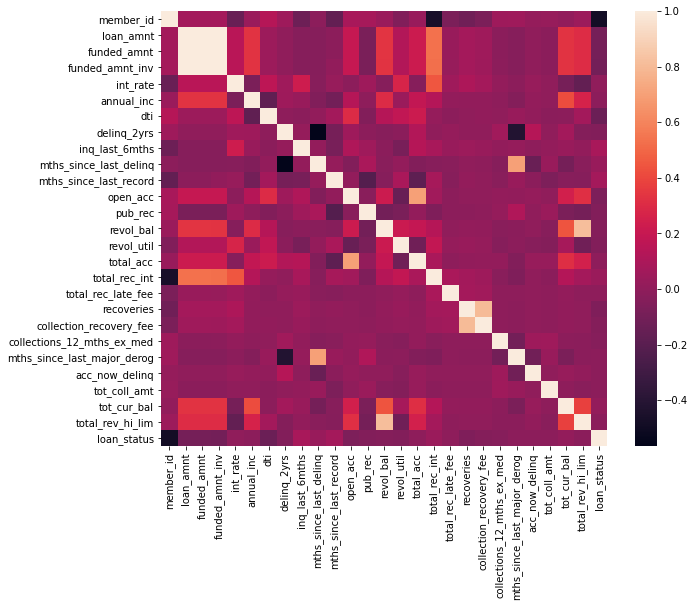

In [6]:
corr = dfBank.corr()
plt.figure(figsize = (10, 8))
sn.heatmap(corr)
plt.show()

In [7]:
dfBank.drop(['funded_amnt','funded_amnt_inv'], axis=1, inplace=True)


In [8]:
dfBank_TEST.drop(['funded_amnt','funded_amnt_inv'], axis=1, inplace=True)

In [9]:
dfBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   term                         532428 non-null  object 
 3   batch_enrolled               447279 non-null  object 
 4   int_rate                     532428 non-null  float64
 5   grade                        532428 non-null  object 
 6   sub_grade                    532428 non-null  object 
 7   emp_title                    501595 non-null  object 
 8   emp_length                   505537 non-null  object 
 9   home_ownership               532428 non-null  object 
 10  annual_inc                   532425 non-null  float64
 11  verification_status          532428 non-null  object 
 12  pymnt_plan                   532428 non-null  object 
 13 

In [10]:
dfBank['avg_delinq_score'] = (dfBank['mths_since_last_delinq'] + dfBank['mths_since_last_major_derog'])/2.0
dfBank.drop(['mths_since_last_delinq','mths_since_last_major_derog'], axis=1, inplace=True)

In [11]:
dfBank_TEST['avg_delinq_score'] = (dfBank_TEST['mths_since_last_delinq'] + dfBank_TEST['mths_since_last_major_derog'])/2.0
dfBank_TEST.drop(['mths_since_last_delinq','mths_since_last_major_derog'], axis=1, inplace=True)

In [12]:
corr = dfBank.corr()

In [13]:
corr['loan_status'].sort_values(ascending = False).to_frame('corr_value').reset_index()

,index,corr_value
0,loan_status,1.000000
1,inq_last_6mths,0.087339
2,mths_since_last_record,0.073566
3,total_rec_int,0.038344
4,tot_cur_bal,0.014579
5,int_rate,0.002590
6,avg_delinq_score,-0.001319
7,total_acc,-0.002631
8,total_rec_late_fee,-0.004353
9,annual_inc,-0.008596


In [14]:
print(dfBank.corr())

                            member_id  loan_amnt  int_rate  annual_inc  \
member_id                    1.000000   0.065607 -0.141030    0.034649   
loan_amnt                    0.065607   1.000000  0.145037    0.330655   
int_rate                    -0.141030   0.145037  1.000000   -0.072061   
annual_inc                   0.034649   0.330655 -0.072061    1.000000   
dti                          0.134179   0.041866  0.163206   -0.175867   
delinq_2yrs                  0.049956  -0.000454  0.056767    0.047873   
inq_last_6mths              -0.127644  -0.033693  0.228596    0.033426   
mths_since_last_record      -0.161942  -0.012130  0.027094   -0.104513   
open_acc                     0.087966   0.197630 -0.009115    0.134948   
pub_rec                      0.080268  -0.080952  0.052291   -0.007829   
revol_bal                    0.035607   0.333944 -0.035814    0.297585   
revol_util                  -0.053282   0.119956  0.269350    0.037232   
total_acc                    0.030643 

In [15]:
dfBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   member_id                   532428 non-null  int64  
 1   loan_amnt                   532428 non-null  int64  
 2   term                        532428 non-null  object 
 3   batch_enrolled              447279 non-null  object 
 4   int_rate                    532428 non-null  float64
 5   grade                       532428 non-null  object 
 6   sub_grade                   532428 non-null  object 
 7   emp_title                   501595 non-null  object 
 8   emp_length                  505537 non-null  object 
 9   home_ownership              532428 non-null  object 
 10  annual_inc                  532425 non-null  float64
 11  verification_status         532428 non-null  object 
 12  pymnt_plan                  532428 non-null  object 
 13  desc          

In [16]:
dfBank.isna().sum()

member_id                          0
loan_amnt                          0
term                               0
batch_enrolled                 85149
int_rate                           0
grade                              0
sub_grade                          0
emp_title                      30833
emp_length                     26891
home_ownership                     0
annual_inc                         3
verification_status                0
pymnt_plan                         0
desc                          456829
purpose                            0
title                             90
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                       16
inq_last_6mths                    16
mths_since_last_record        450305
open_acc                          16
pub_rec                           16
revol_bal                          0
revol_util                       287
total_acc                         16
i

In [17]:
dfBank.drop(['verification_status_joint'], axis=1, inplace=True)


In [18]:
dfBank_TEST.drop(['verification_status_joint'], axis=1, inplace=True)

In [19]:
dfBank.drop(['desc','title'], axis=1, inplace=True)

In [20]:
dfBank_TEST.drop(['desc','title'], axis=1, inplace=True)

In [21]:
dfBank.drop(['member_id'], axis=1, inplace=True)
for key, value in dfBank.iteritems():
    print(key, ' -> ', len(dfBank[key].unique().tolist()))
    

loan_amnt  ->  1370
term  ->  2
batch_enrolled  ->  105
int_rate  ->  535
grade  ->  7
sub_grade  ->  35
emp_title  ->  190125
emp_length  ->  12
home_ownership  ->  6
annual_inc  ->  33989
verification_status  ->  3
pymnt_plan  ->  2
purpose  ->  14
zip_code  ->  917
addr_state  ->  51
dti  ->  4058
delinq_2yrs  ->  27
inq_last_6mths  ->  24
mths_since_last_record  ->  123
open_acc  ->  74
pub_rec  ->  29
revol_bal  ->  63459
revol_util  ->  1266
total_acc  ->  127
initial_list_status  ->  2
total_rec_int  ->  243149
total_rec_late_fee  ->  4073
recoveries  ->  14024
collection_recovery_fee  ->  12617
collections_12_mths_ex_med  ->  10
application_type  ->  2
last_week_pay  ->  98
acc_now_delinq  ->  9
tot_coll_amt  ->  8082
tot_cur_bal  ->  251641
total_rev_hi_lim  ->  14698
loan_status  ->  2
avg_delinq_score  ->  264


In [22]:
dfBank_TEST.drop(['member_id'], axis=1, inplace=True)

In [23]:
dfBank.loan_status.value_counts(normalize=True)


0    0.763673
1    0.236327
Name: loan_status, dtype: float64

In [24]:
dfBank.loan_status.value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [25]:
#dfBank_major = dfBank[dfBank.loan_status == 0]
#dfBank_minor = dfBank[dfBank.loan_status == 1]
#dfBank_minor_upsampled = resample(dfBank_minor, replace = True, n_samples = 406601, random_state = 2000)
#dfBank_minor_upsampled = pd.concat([dfBank_minor_upsampled, dfBank_major])
#dfBank_minor_upsampled.loan_status.value_counts()
# resampling to overcome imbalanced sample set

In [26]:
#X = dfBank_minor_upsampled.drop('loan_status', axis = 1)
#Y = dfBank_minor_upsampled.loan_status
#xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=0)
#xtrain_scaled = xtrain.apply(lambda x: MinMaxScaler().fit_transform(x))
dfBank.columns
dfBank.describe(include='all')


,loan_amnt,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,avg_delinq_score
count,532428.000000,532428,447279,532428.000000,532428,532428,501595,505537,532428,5.324250e+05,...,532428.000000,532333.000000,532428,532428,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000,127528.000000
unique,NaN,2,104,NaN,7,35,190124,11,6,NaN,...,NaN,NaN,2,98,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,36 months,,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,INDIVIDUAL,13th week,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,372793,106079,NaN,152713,33844,8280,175105,265940,NaN,...,NaN,NaN,532123,30333,NaN,NaN,NaN,NaN,NaN,NaN
mean,14757.595722,NaN,NaN,13.242969,NaN,NaN,NaN,NaN,NaN,7.502984e+04,...,4.859221,0.014299,NaN,NaN,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327,39.624114
std,8434.420080,NaN,NaN,4.379611,NaN,NaN,NaN,NaN,NaN,6.519985e+04,...,63.123361,0.133005,NaN,NaN,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826,20.169074
min,500.000000,NaN,NaN,5.320000,NaN,NaN,NaN,NaN,NaN,1.200000e+03,...,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8000.000000,NaN,NaN,9.990000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,0.000000,0.000000,NaN,NaN,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000,24.000000
50%,13000.000000,NaN,NaN,12.990000,NaN,NaN,NaN,NaN,NaN,6.500000e+04,...,0.000000,0.000000,NaN,NaN,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000,38.000000
75%,20000.000000,NaN,NaN,16.200000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,0.000000,0.000000,NaN,NaN,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000,54.500000


In [27]:
dfBank.columns

Index(['loan_amnt', 'term', 'batch_enrolled', 'int_rate', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'application_type', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status', 'avg_delinq_score'],
      dtype='object')

In [28]:
dfBank.describe(include=object)

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status,application_type,last_week_pay
count,532428,447279,532428,532428,501595,505537,532428,532428,532428,532428,532428,532428,532428,532428,532428
unique,2,104,7,35,190124,11,6,3,2,14,917,51,2,2,98
top,36 months,,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,n,debt_consolidation,945xx,CA,f,INDIVIDUAL,13th week
freq,372793,106079,152713,33844,8280,175105,265940,197750,532420,314989,5845,77911,274018,532123,30333


In [29]:
dfBank.describe(include=np.number)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_record,open_acc,pub_rec,revol_bal,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,avg_delinq_score
count,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,...,532428.000000,532428.000000,532428.000000,532333.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000,127528.000000
mean,14757.595722,13.242969,7.502984e+04,18.138767,0.314448,0.694603,70.093068,11.545594,0.194858,1.692128e+04,...,0.394954,45.717832,4.859221,0.014299,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327,39.624114
std,8434.420080,4.379611,6.519985e+04,8.369074,0.860045,0.997025,28.139219,5.311442,0.583822,2.242322e+04,...,4.091546,409.647467,63.123361,0.133005,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826,20.169074
min,500.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,51.000000,8.000000,0.000000,6.444000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000,24.000000
50%,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,70.000000,11.000000,0.000000,1.187600e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000,38.000000
75%,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,92.000000,14.000000,0.000000,2.084300e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000,54.500000
max,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,121.000000,90.000000,86.000000,2.568995e+06,...,358.680000,33520.270000,7002.190000,16.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000,180.000000


<AxesSubplot:xlabel='dti', ylabel='loan_status'>

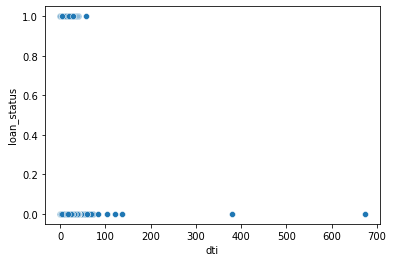

In [30]:
#Scatterplot matrix - to help spot and remove outliers
sn.scatterplot(data=dfBank, x="dti", y="loan_status")

In [31]:
dfBank = dfBank[dfBank["dti"]<=200]
dfBank = dfBank[dfBank["pub_rec"]<=80]
# outliers - leaving out for lack of time
# Not standardizing/normalizing data for Logistic Regression


In [32]:
dfBank.describe(include=np.number)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_record,open_acc,pub_rec,revol_bal,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,avg_delinq_score
count,532409.000000,532409.000000,5.324090e+05,532409.000000,532409.000000,532409.000000,82122.000000,532409.000000,532409.000000,5.324090e+05,...,532409.000000,532409.000000,532409.000000,532330.000000,532409.000000,490421.000000,4.904210e+05,4.904210e+05,532409.000000,127526.000000
mean,14757.928585,13.243066,7.503054e+04,18.137158,0.314450,0.694601,70.093690,11.545579,0.194698,1.692183e+04,...,0.394702,45.708570,4.855600,0.014299,0.005015,213.563424,1.395542e+05,3.208063e+04,0.236311,39.623841
std,8434.348577,4.379612,6.520019e+04,8.305926,0.860047,0.997022,28.138826,5.311417,0.571858,2.242341e+04,...,4.088230,409.599153,63.079648,0.133006,0.079117,1958.577468,1.539150e+05,3.805310e+04,0.424816,20.168989
min,500.000000,5.320000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,51.000000,8.000000,0.000000,6.445000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.984000e+04,1.400000e+04,0.000000,24.000000
50%,13000.000000,12.990000,6.500000e+04,17.660000,0.000000,0.000000,70.000000,11.000000,0.000000,1.187600e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.067000e+04,2.370000e+04,0.000000,38.000000
75%,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,92.000000,14.000000,0.000000,2.084400e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.084790e+05,3.980000e+04,0.000000,54.500000
max,35000.000000,28.990000,9.500000e+06,137.400000,30.000000,31.000000,121.000000,90.000000,63.000000,2.568995e+06,...,358.680000,33520.270000,7002.190000,16.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000,180.000000


<AxesSubplot:>

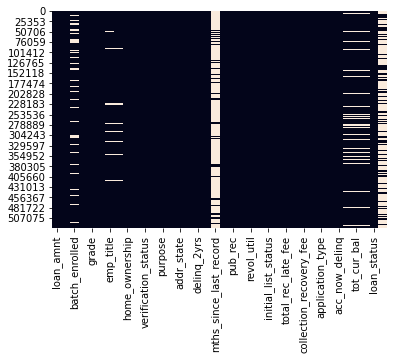

In [33]:
sn.heatmap(dfBank.isnull(), cbar=False)

In [34]:
obj_dfBank = dfBank.select_dtypes(include=['object']).copy()
obj_dfBank.head(50)
#pd.get_dummies(obj_dfBank).head()

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status,application_type,last_week_pay
0,36 months,,E,E3,clerk,9 years,OWN,Source Verified,n,debt_consolidation,349xx,FL,f,INDIVIDUAL,26th week
1,36 months,BAT1586599,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,Source Verified,n,home_improvement,209xx,MD,w,INDIVIDUAL,9th week
2,36 months,BAT1586599,A,A4,Driver,2 years,OWN,Not Verified,n,debt_consolidation,447xx,OH,w,INDIVIDUAL,9th week
3,36 months,BAT4808022,D,D5,Us office of Personnel Management,10+ years,RENT,Not Verified,n,debt_consolidation,221xx,VA,f,INDIVIDUAL,135th week
4,36 months,BAT2833642,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,Verified,n,credit_card,900xx,CA,w,INDIVIDUAL,96th week
5,36 months,BAT2575549,A,A5,Design Consultant,2 years,MORTGAGE,Not Verified,n,debt_consolidation,461xx,IN,f,INDIVIDUAL,113th week
6,36 months,,A,A4,TOYOTA OF NORTH HOLLYWOOD,5 years,RENT,Source Verified,n,debt_consolidation,913xx,CA,f,INDIVIDUAL,117th week
7,36 months,NaN,B,B1,Banker,8 years,MORTGAGE,Not Verified,n,credit_card,351xx,AL,f,INDIVIDUAL,78th week
8,36 months,BAT4136152,C,C4,LVN,7 years,MORTGAGE,Not Verified,n,home_improvement,917xx,CA,w,INDIVIDUAL,44th week
9,60 months,BAT4694572,D,D4,Registered Nurse,2 years,MORTGAGE,Verified,n,debt_consolidation,427xx,KY,w,INDIVIDUAL,52th week


In [35]:
obj_dfBank_TEST = dfBank_TEST.select_dtypes(include=['object']).copy()

In [36]:
#sn.factorplot('emp_title',data=dfBank,kind='count')
#pd.get_dummies(obj_dfBank).head()
dfBank.emp_title.value_counts().head(50) 

Teacher                     8279
Manager                     6922
Registered Nurse            3387
Owner                       3305
RN                          3255
Supervisor                  3215
Sales                       2668
Project Manager             2473
Office Manager              2189
Driver                      2187
Director                    1994
manager                     1967
General Manager             1954
owner                       1782
teacher                     1766
Engineer                    1660
President                   1646
Vice President              1487
driver                      1480
Attorney                    1330
Accountant                  1281
Operations Manager          1279
Administrative Assistant    1276
Sales Manager               1131
supervisor                  1116
Account Manager             1113
sales                       1091
Police Officer              1051
Executive Assistant          992
Analyst                      972
Technician

In [37]:
#obj_dfBank.drop(['emp_title'], axis=1, inplace=True)

In [38]:
dfBank.term.value_counts().head(50) 

36 months    372775
60 months    159634
Name: term, dtype: int64

In [39]:
dfBank.batch_enrolled.value_counts().head(50)

              106078
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
BAT1586599     14462
BAT1780517     13918
BAT1104812     13505
BAT4694572     13504
BAT1184694     12251
BAT3193689     11189
BAT4271519     10994
BAT3726927     10977
BAT4136152      9667
BAT2558388      9601
BAT5924421      9071
BAT2136391      7422
BAT5489674      7291
BAT2333412      7192
BAT3461431      6583
BAT2522922      6250
BAT1766061      5997
BAT224923       5858
BAT5629144      5731
BAT2575549      5638
BAT1930365      5378
BAT4351734      4971
BAT5525466      4926
BAT2833642      4595
BAT4808022      4181
BAT2003848      4129
BAT4722912      4043
BAT2428731      4004
BAT5341619      3598
BAT5714674      3231
BAT3865626      2847
BAT1467036      2705
BAT5547201      2459
BAT5811547      2412
BAT1761981      2400
BAT5849876      2357
BAT1135695      2041
BAT3943761      1814
BAT3292317      1449
BAT2677031      1337
BAT3372536      1247
BAT1327206      1102
BAT47674     

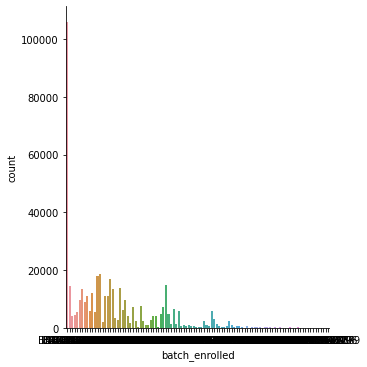

In [40]:
sn.factorplot('batch_enrolled',data=dfBank,kind='count')

In [41]:
pd.isna(dfBank['batch_enrolled'])

0         False
1         False
2         False
3         False
4         False
          ...  
532423    False
532424    False
532425     True
532426    False
532427    False
Name: batch_enrolled, Length: 532409, dtype: bool

In [42]:
nan_value = float("NaN") #Convert NaN values to empty string.
dfBank['batch_enrolled'].replace(" ", np.nan, inplace=True) # this whitespace matter!
dfBank.dropna(subset = ["batch_enrolled"], inplace=True)


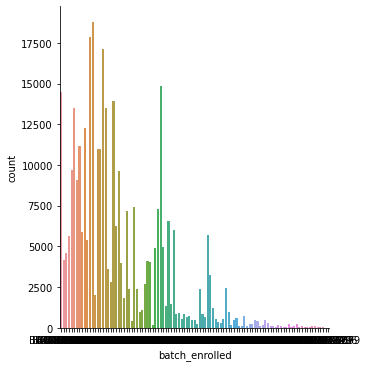

In [43]:
sn.factorplot('batch_enrolled',data=dfBank,kind='count')

In [44]:
dfBank['batch_enrolled'].value_counts().head(50)

BAT2252229    18791
BAT3873588    17839
BAT2803411    17111
BAT2078974    14859
BAT1586599    14462
BAT1780517    13918
BAT1104812    13505
BAT4694572    13504
BAT1184694    12251
BAT3193689    11189
BAT4271519    10994
BAT3726927    10977
BAT4136152     9667
BAT2558388     9601
BAT5924421     9071
BAT2136391     7422
BAT5489674     7291
BAT2333412     7192
BAT3461431     6583
BAT2522922     6250
BAT1766061     5997
BAT224923      5858
BAT5629144     5731
BAT2575549     5638
BAT1930365     5378
BAT4351734     4971
BAT5525466     4926
BAT2833642     4595
BAT4808022     4181
BAT2003848     4129
BAT4722912     4043
BAT2428731     4004
BAT5341619     3598
BAT5714674     3231
BAT3865626     2847
BAT1467036     2705
BAT5547201     2459
BAT5811547     2412
BAT1761981     2400
BAT5849876     2357
BAT1135695     2041
BAT3943761     1814
BAT3292317     1449
BAT2677031     1337
BAT3372536     1247
BAT1327206     1102
BAT47674        976
BAT5046385      961
BAT1942645      890
BAT2015867      849


In [45]:
dfBank.head(10)

,loan_amnt,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,avg_delinq_score
1,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,...,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0,0,NaN
2,10000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,...,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0,0,NaN
3,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,...,0.0,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0,0,NaN
4,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,...,0.0,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,47033.0,0,NaN
5,15000,36 months,BAT2575549,8.90,A,A5,Design Consultant,2 years,MORTGAGE,120000.0,...,0.0,0.0,INDIVIDUAL,113th week,0.0,0.0,350619.0,29500.0,0,NaN
8,6000,36 months,BAT4136152,13.99,C,C4,LVN,7 years,MORTGAGE,92000.0,...,0.0,0.0,INDIVIDUAL,44th week,0.0,0.0,281521.0,62100.0,0,NaN
9,34550,60 months,BAT4694572,17.14,D,D4,Registered Nurse,2 years,MORTGAGE,72000.0,...,0.0,0.0,INDIVIDUAL,52th week,0.0,0.0,76034.0,33200.0,0,NaN
12,18000,36 months,BAT5924421,6.99,A,A3,driver,7 years,MORTGAGE,62000.0,...,0.0,0.0,INDIVIDUAL,48th week,0.0,0.0,194011.0,139900.0,0,NaN
13,9000,36 months,BAT3193689,6.03,A,A1,Federal Law Enforcement,10+ years,MORTGAGE,145000.0,...,0.0,0.0,INDIVIDUAL,78th week,0.0,0.0,165164.0,43000.0,0,NaN
14,8800,36 months,BAT224923,13.65,C,C1,Truck Driver,10+ years,RENT,80000.0,...,0.0,0.0,INDIVIDUAL,82th week,0.0,0.0,39634.0,41200.0,1,NaN


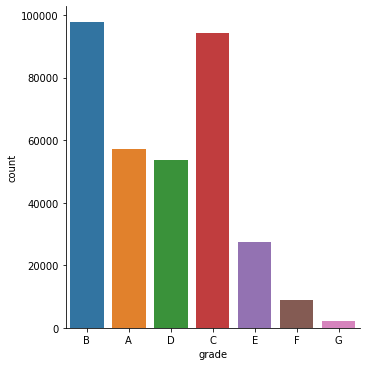

In [46]:
sn.factorplot('grade',data=dfBank,kind='count')

In [47]:
dfBank.grade.value_counts().head(50)

B    97908
C    94278
A    57071
D    53649
E    27299
F     8904
G     2075
Name: grade, dtype: int64

In [48]:
# merging the lesser valued categories, E, F, and G
threshold_percent = 10
series = pd.value_counts(dfBank['grade'])
mask = (series / series.sum() * 100).lt(threshold_percent)
print(mask)
dfBank = dfBank.assign(gradeMerged = np.where(dfBank['grade'].isin(series[mask].index),'Other', dfBank['grade']))

B    False
C    False
A    False
D    False
E     True
F     True
G     True
Name: grade, dtype: bool


In [49]:
dfBank_TEST = dfBank_TEST.assign(gradeMerged = np.where(dfBank_TEST['grade'].isin(series[mask].index),'Other', dfBank_TEST['grade']))

In [50]:
dfBank.gradeMerged.value_counts()

B        97908
C        94278
A        57071
D        53649
Other    38278
Name: gradeMerged, dtype: int64

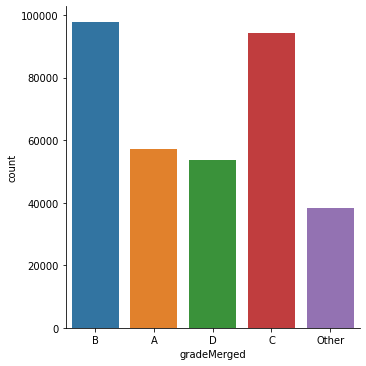

In [51]:
sn.factorplot('gradeMerged',data=dfBank,kind='count')

In [52]:
dfBank.sub_grade.value_counts().head(50)

B3    21707
B4    21253
C1    20546
C2    20045
C3    19302
B5    18923
B2    18841
C4    18597
A5    17359
B1    17184
C5    15788
D1    14003
A4    13262
D2    11511
D3    10052
D4     9726
A3     9083
A1     8714
A2     8653
D5     8357
E1     7012
E2     6576
E3     5422
E4     4577
E5     3712
F1     2780
F2     2093
F3     1741
F4     1316
F5      974
G1      738
G2      494
G3      355
G4      264
G5      224
Name: sub_grade, dtype: int64

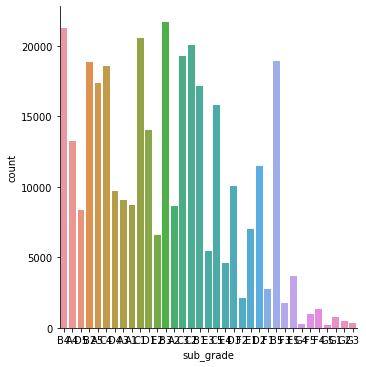

In [53]:
sn.factorplot('sub_grade',data=dfBank,kind='count')


In [54]:
threshold_percent = .5
series = pd.value_counts(dfBank['sub_grade'])
mask = (series / series.sum() * 100).lt(threshold_percent)
print(mask)

B3    False
B4    False
C1    False
C2    False
C3    False
B5    False
B2    False
C4    False
A5    False
B1    False
C5    False
D1    False
A4    False
D2    False
D3    False
D4    False
A3    False
A1    False
A2    False
D5    False
E1    False
E2    False
E3    False
E4    False
E5    False
F1    False
F2    False
F3    False
F4     True
F5     True
G1     True
G2     True
G3     True
G4     True
G5     True
Name: sub_grade, dtype: bool


In [55]:
dfBank.emp_title.value_counts().head(50)

Teacher                     5385
Manager                     4398
Registered Nurse            2169
Owner                       2119
Supervisor                  2115
RN                          2104
Sales                       1695
Project Manager             1594
Driver                      1405
Office Manager              1401
Director                    1272
manager                     1231
General Manager             1220
owner                       1158
teacher                     1140
President                   1060
Engineer                    1055
Vice President               965
driver                       961
Attorney                     865
Accountant                   833
Administrative Assistant     814
Operations Manager           814
supervisor                   729
Sales Manager                715
Account Manager              700
sales                        686
Police Officer               686
Executive Assistant          634
Technician                   625
Analyst   

In [56]:
#sn.factorplot('emp_title',data=dfBank,kind='count')

In [57]:
dfBank.emp_length.value_counts().head(50)

10+ years    112314
2 years       30293
< 1 year      27123
3 years       27081
1 year        21880
5 years       21474
4 years       20114
8 years       17063
7 years       16943
6 years       16478
9 years       13216
Name: emp_length, dtype: int64

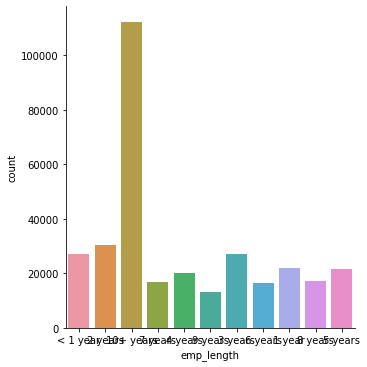

In [58]:
sn.factorplot('emp_length',data=dfBank,kind='count')

In [59]:
dfBank.home_ownership.value_counts().head(50)

MORTGAGE    170316
RENT        136904
OWN          33868
OTHER           72
NONE            22
ANY              2
Name: home_ownership, dtype: int64

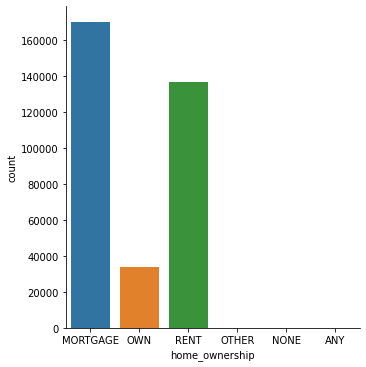

In [60]:
sn.factorplot('home_ownership',data=dfBank,kind='count')

In [61]:
threshold_percent = 10
series = pd.value_counts(dfBank['home_ownership'])
mask = (series / series.sum() * 100).lt(threshold_percent)
print(mask)
dfBank = dfBank.assign(ownershipMerged = np.where(dfBank['home_ownership'].isin(series[mask].index),'Other', dfBank['home_ownership']))


MORTGAGE    False
RENT        False
OWN          True
OTHER        True
NONE         True
ANY          True
Name: home_ownership, dtype: bool


In [62]:
dfBank_TEST = dfBank_TEST.assign(ownershipMerged = np.where(dfBank_TEST['home_ownership'].isin(series[mask].index),'Other', dfBank_TEST['home_ownership']))


In [63]:
dfBank.ownershipMerged.value_counts().head(50)

MORTGAGE    170316
RENT        136904
Other        33964
Name: ownershipMerged, dtype: int64

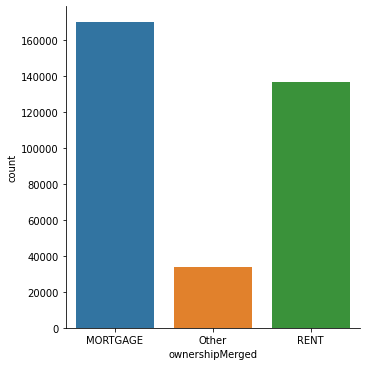

In [64]:
sn.factorplot('ownershipMerged',data=dfBank,kind='count')

In [65]:
dfBank.verification_status.value_counts().head(50)

Source Verified    127024
Verified           111748
Not Verified       102412
Name: verification_status, dtype: int64

In [66]:
dfBank.pymnt_plan.value_counts().head(50)

n    341180
y         4
Name: pymnt_plan, dtype: int64

In [67]:
threshold_percent = 10
series = pd.value_counts(dfBank['pymnt_plan'])
mask = (series / series.sum() * 100).lt(threshold_percent)
print(mask)
dfBank = dfBank.assign(pymnt_plan_merged = np.where(dfBank['pymnt_plan'].isin(series[mask].index),'Other', dfBank['pymnt_plan']))


n    False
y     True
Name: pymnt_plan, dtype: bool


In [68]:
dfBank_TEST = dfBank_TEST.assign(pymnt_plan_merged = np.where(dfBank_TEST['pymnt_plan'].isin(series[mask].index),'Other', dfBank_TEST['pymnt_plan']))


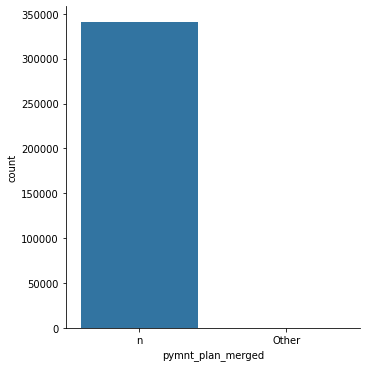

In [69]:
sn.factorplot('pymnt_plan_merged',data=dfBank,kind='count')

In [70]:
pd.set_option('display.max_columns', None)
dfBank.head(50)

,loan_amnt,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,avg_delinq_score,gradeMerged,ownershipMerged,pymnt_plan_merged
1,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,209xx,MD,3.64,0.0,1.0,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.00,0.00,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0,0,NaN,B,MORTGAGE,n
2,10000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,447xx,OH,18.42,0.0,0.0,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.00,0.00,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0,0,NaN,A,Other,n
3,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,debt_consolidation,221xx,VA,14.97,0.0,2.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.00,0.00,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0,0,NaN,D,RENT,n
4,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,credit_card,900xx,CA,20.16,0.0,0.0,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.00,0.00,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,47033.0,0,NaN,B,RENT,n
5,15000,36 months,BAT2575549,8.90,A,A5,Design Consultant,2 years,MORTGAGE,120000.0,Not Verified,n,debt_consolidation,461xx,IN,12.30,0.0,0.0,NaN,18.0,0.0,19040.0,64.5,30.0,f,1957.24,0.0,0.00,0.00,0.0,INDIVIDUAL,113th week,0.0,0.0,350619.0,29500.0,0,NaN,A,MORTGAGE,n
8,6000,36 months,BAT4136152,13.99,C,C4,LVN,7 years,MORTGAGE,92000.0,Not Verified,n,home_improvement,917xx,CA,30.85,0.0,0.0,NaN,16.0,0.0,47567.0,76.6,27.0,w,621.72,0.0,0.00,0.00,0.0,INDIVIDUAL,44th week,0.0,0.0,281521.0,62100.0,0,NaN,C,MORTGAGE,n
9,34550,60 months,BAT4694572,17.14,D,D4,Registered Nurse,2 years,MORTGAGE,72000.0,Verified,n,debt_consolidation,427xx,KY,33.92,0.0,0.0,NaN,12.0,0.0,30040.0,90.5,30.0,w,5535.46,0.0,0.00,0.00,0.0,INDIVIDUAL,52th week,0.0,0.0,76034.0,33200.0,0,NaN,D,MORTGAGE,n
12,18000,36 months,BAT5924421,6.99,A,A3,driver,7 years,MORTGAGE,62000.0,Not Verified,n,credit_card,381xx,TN,18.58,0.0,2.0,NaN,15.0,0.0,47795.0,34.2,31.0,f,992.37,0.0,0.00,0.00,0.0,INDIVIDUAL,48th week,0.0,0.0,194011.0,139900.0,0,NaN,A,MORTGAGE,n
13,9000,36 months,BAT3193689,6.03,A,A1,Federal Law Enforcement,10+ years,MORTGAGE,145000.0,Not Verified,n,credit_card,773xx,TX,15.42,0.0,0.0,NaN,19.0,0.0,11685.0,27.2,39.0,f,633.42,0.0,0.00,0.00,0.0,INDIVIDUAL,78th week,0.0,0.0,165164.0,43000.0,0,NaN,A,MORTGAGE,n
14,8800,36 months,BAT224923,13.65,C,C1,Truck Driver,10+ years,RENT,80000.0,Not Verified,n,debt_consolidation,917xx,CA,13.98,0.0,1.0,NaN,12.0,0.0,17060.0,41.4,17.0,w,1521.50,0.0,0.00,0.00,0.0,INDIVIDUAL,82th week,0.0,0.0,39634.0,41200.0,1,NaN,C,RENT,n


In [71]:
dfBank.purpose.value_counts().head(50)

debt_consolidation    201713
credit_card            79157
home_improvement       19890
other                  16566
major_purchase          6585
small_business          3949
car                     3394
medical                 3308
moving                  2118
vacation                1799
house                   1426
wedding                  915
renewable_energy         202
educational              162
Name: purpose, dtype: int64

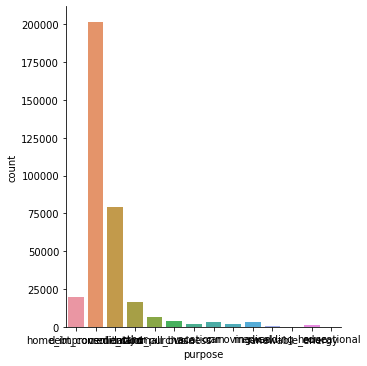

In [72]:
sn.factorplot('purpose',data=dfBank,kind='count')

In [73]:
threshold_percent = 5
series = pd.value_counts(dfBank['purpose'])
mask = (series / series.sum() * 100).lt(threshold_percent)
print(mask)
dfBank = dfBank.assign(purpose_merged = np.where(dfBank['purpose'].isin(series[mask].index),'Other', dfBank['purpose']))


debt_consolidation    False
credit_card           False
home_improvement      False
other                  True
major_purchase         True
small_business         True
car                    True
medical                True
moving                 True
vacation               True
house                  True
wedding                True
renewable_energy       True
educational            True
Name: purpose, dtype: bool


In [74]:
dfBank_TEST = dfBank_TEST.assign(purpose_merged = np.where(dfBank_TEST['purpose'].isin(series[mask].index),'Other', dfBank_TEST['purpose']))


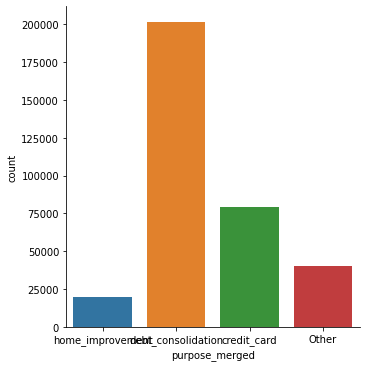

In [75]:
sn.factorplot('purpose_merged',data=dfBank,kind='count')

In [76]:
dfBank.zip_code.value_counts().head(50)

750xx    3641
945xx    3611
112xx    3575
606xx    3310
300xx    3036
100xx    2900
900xx    2887
070xx    2877
331xx    2869
770xx    2736
891xx    2438
117xx    2396
917xx    2386
330xx    2345
104xx    2250
921xx    2181
852xx    2110
926xx    2105
913xx    2011
925xx    1929
334xx    1881
113xx    1789
601xx    1776
080xx    1754
481xx    1745
956xx    1712
021xx    1707
600xx    1687
853xx    1674
604xx    1670
920xx    1650
941xx    1641
928xx    1631
980xx    1630
301xx    1605
773xx    1592
802xx    1569
201xx    1566
850xx    1554
760xx    1540
207xx    1503
774xx    1478
951xx    1468
923xx    1453
480xx    1422
088xx    1407
212xx    1382
782xx    1374
800xx    1351
554xx    1349
Name: zip_code, dtype: int64

In [77]:
dfBank.addr_state.value_counts().head(50)

CA    49908
NY    28375
TX    27295
FL    23652
IL    13507
NJ    12853
PA    12066
OH    11415
GA    11087
VA    10140
NC     9497
MI     8875
AZ     8056
MD     8010
MA     7882
WA     7519
CO     7234
MN     6111
MO     5495
IN     5218
CT     5183
TN     5000
NV     4730
WI     4400
AL     4373
OR     4148
LA     4054
SC     3992
KY     3263
OK     3084
KS     3082
AR     2552
UT     2447
NM     1917
HI     1747
WV     1678
NH     1633
RI     1489
MS     1473
MT     1000
DE      975
DC      967
AK      826
WY      795
SD      705
VT      646
NE      439
ME      215
ND      169
IA        4
Name: addr_state, dtype: int64

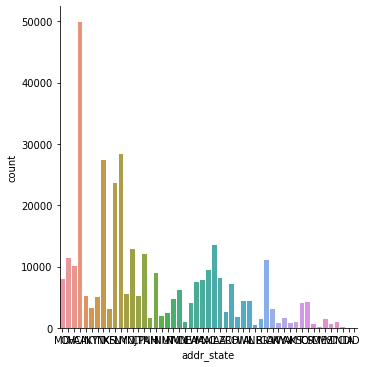

In [78]:
sn.factorplot('addr_state',data=dfBank,kind='count')

In [79]:
dfBank.initial_list_status.value_counts().head(50)

f    175887
w    165297
Name: initial_list_status, dtype: int64

In [80]:
dfBank.application_type.value_counts().head(50)

INDIVIDUAL    340972
JOINT            212
Name: application_type, dtype: int64

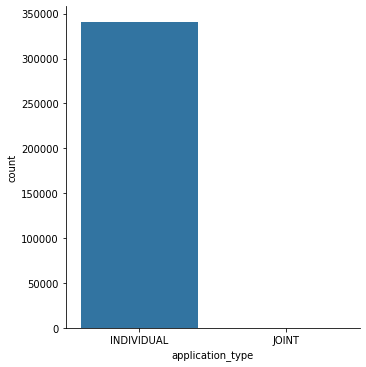

In [81]:
sn.factorplot('application_type',data=dfBank,kind='count')

In [82]:
threshold_percent = 10
series = pd.value_counts(dfBank['application_type'])
mask = (series / series.sum() * 100).lt(threshold_percent)
print(mask)
dfBank = dfBank.assign(application_type_merged = np.where(dfBank['application_type'].isin(series[mask].index),'Other', dfBank['application_type']))


INDIVIDUAL    False
JOINT          True
Name: application_type, dtype: bool


In [83]:
dfBank_TEST = dfBank_TEST.assign(application_type_merged = np.where(dfBank_TEST['application_type'].isin(series[mask].index),'Other', dfBank_TEST['application_type']))


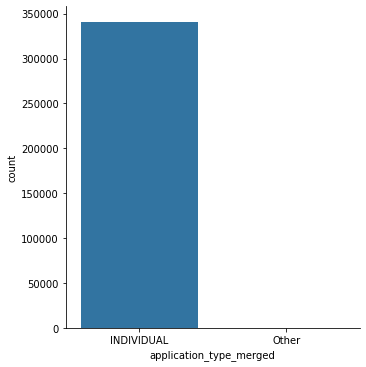

In [84]:
sn.factorplot('application_type_merged',data=dfBank,kind='count')

In [85]:
print(dfBank_TEST.shape)

(354951, 42)


In [86]:

dfBank.last_week_pay.value_counts().head(50)#last_week_pay

13th week     19465
9th week      18377
26th week     17754
22th week     16740
4th week      16575
35th week     15342
39th week     15295
17th week     14118
31th week     13713
52th week     12477
48th week     12283
65th week     12249
61th week     11517
78th week      9047
74th week      8548
87th week      7223
91th week      6913
NAth week      6792
44th week      6590
83th week      6241
70th week      6165
156th week     5435
100th week     5338
43th week      5192
57th week      5032
109th week     4996
104th week     4906
96th week      4317
113th week     4124
117th week     4069
161th week     3720
122th week     3560
126th week     3479
56th week      3273
135th week     2976
157th week     2793
139th week     2478
131th week     2308
30th week      2190
148th week     2069
152th week     1778
95th week      1698
144th week     1625
82th week      1277
130th week     1130
18th week      1036
69th week       817
143th week      646
0th week        528
165th week      418


In [87]:
pd.set_option('display.max_columns', None)
dfBank.head(3)
#dfBank.drop(['funded_amnt','funded_amnt_inv'], axis=1, inplace=True)

,loan_amnt,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,avg_delinq_score,gradeMerged,ownershipMerged,pymnt_plan_merged,purpose_merged,application_type_merged
1,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,209xx,MD,3.64,0.0,1.0,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0,0,NaN,B,MORTGAGE,n,home_improvement,INDIVIDUAL
2,10000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,447xx,OH,18.42,0.0,0.0,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0,0,NaN,A,Other,n,debt_consolidation,INDIVIDUAL
3,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,debt_consolidation,221xx,VA,14.97,0.0,2.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0,0,NaN,D,RENT,n,debt_consolidation,INDIVIDUAL


In [88]:
dfBank.drop(['grade','home_ownership','application_type','pymnt_plan','purpose'], axis=1, inplace=True)

In [89]:
dfBank.drop(['emp_title'], axis=1, inplace=True)

In [90]:
dfBank_TEST.drop(['grade','home_ownership','application_type','pymnt_plan','purpose','emp_title'], axis=1, inplace=True)

In [91]:
dfBank.head()

,loan_amnt,term,batch_enrolled,int_rate,sub_grade,emp_length,annual_inc,verification_status,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,avg_delinq_score,gradeMerged,ownershipMerged,pymnt_plan_merged,purpose_merged,application_type_merged
1,4800,36 months,BAT1586599,10.99,B4,< 1 year,65000.0,Source Verified,209xx,MD,3.64,0.0,1.0,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,9th week,0.0,0.0,9974.0,32900.0,0,NaN,B,MORTGAGE,n,home_improvement,INDIVIDUAL
2,10000,36 months,BAT1586599,7.26,A4,2 years,45000.0,Not Verified,447xx,OH,18.42,0.0,0.0,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,9th week,0.0,65.0,38295.0,34900.0,0,NaN,A,Other,n,debt_consolidation,INDIVIDUAL
3,15000,36 months,BAT4808022,19.72,D5,10+ years,105000.0,Not Verified,221xx,VA,14.97,0.0,2.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,135th week,0.0,0.0,55564.0,24700.0,0,NaN,D,RENT,n,debt_consolidation,INDIVIDUAL
4,16000,36 months,BAT2833642,10.64,B2,10+ years,52000.0,Verified,900xx,CA,20.16,0.0,0.0,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,96th week,0.0,0.0,47159.0,47033.0,0,NaN,B,RENT,n,credit_card,INDIVIDUAL
5,15000,36 months,BAT2575549,8.90,A5,2 years,120000.0,Not Verified,461xx,IN,12.30,0.0,0.0,NaN,18.0,0.0,19040.0,64.5,30.0,f,1957.24,0.0,0.0,0.0,0.0,113th week,0.0,0.0,350619.0,29500.0,0,NaN,A,MORTGAGE,n,debt_consolidation,INDIVIDUAL


In [92]:
print(dfBank_TEST.shape)

(354951, 36)


In [93]:
dfBank.shape

(341184, 37)

In [94]:
obj_dfBank = dfBank.select_dtypes(include=['object']).copy()
obj_dfBank.head()

,term,batch_enrolled,sub_grade,emp_length,verification_status,zip_code,addr_state,initial_list_status,last_week_pay,gradeMerged,ownershipMerged,pymnt_plan_merged,purpose_merged,application_type_merged
1,36 months,BAT1586599,B4,< 1 year,Source Verified,209xx,MD,w,9th week,B,MORTGAGE,n,home_improvement,INDIVIDUAL
2,36 months,BAT1586599,A4,2 years,Not Verified,447xx,OH,w,9th week,A,Other,n,debt_consolidation,INDIVIDUAL
3,36 months,BAT4808022,D5,10+ years,Not Verified,221xx,VA,f,135th week,D,RENT,n,debt_consolidation,INDIVIDUAL
4,36 months,BAT2833642,B2,10+ years,Verified,900xx,CA,w,96th week,B,RENT,n,credit_card,INDIVIDUAL
5,36 months,BAT2575549,A5,2 years,Not Verified,461xx,IN,f,113th week,A,MORTGAGE,n,debt_consolidation,INDIVIDUAL


In [95]:
obj_dfBank_TEST = dfBank_TEST.select_dtypes(include=['object']).copy()

In [96]:
pd.get_dummies(obj_dfBank.batch_enrolled).head()

,BAT1104812,BAT1135695,BAT1184694,BAT1273836,BAT1327206,BAT1467036,BAT1521494,BAT1575727,BAT1586599,BAT1691418,BAT1755192,BAT1761981,BAT1766061,BAT1780517,BAT1864701,BAT1914408,BAT1930365,BAT1942645,BAT2003848,BAT2015867,BAT20678,BAT2078974,BAT2136391,BAT2143459,BAT224923,BAT2252229,BAT2331079,BAT2333412,BAT2428731,BAT2522922,BAT2558388,BAT2575549,BAT2677031,BAT2803411,BAT2833642,BAT2881062,BAT2881453,BAT291187,BAT2974007,BAT3147293,BAT3157685,BAT3160077,BAT3193689,BAT3260421,BAT3275209,BAT3292317,BAT3372536,BAT3461431,BAT3474907,BAT348786,BAT3518025,BAT3537993,BAT357701,BAT3594334,BAT3706046,BAT3726927,BAT3839056,BAT3865626,BAT3873588,BAT3943761,BAT3965509,BAT3975721,BAT4051248,BAT4136152,BAT4160421,BAT4201183,BAT4250975,BAT4260473,BAT4271519,BAT4347689,BAT4351734,BAT447257,BAT4694572,BAT4722912,BAT4726815,BAT4734809,BAT47674,BAT4780022,BAT4786748,BAT4808022,BAT4884699,BAT4935307,BAT4939736,BAT5046385,BAT5077496,BAT5320519,BAT5341619,BAT5458862,BAT5477261,BAT5489674,BAT5525466,BAT5540558,BAT5547201,BAT5597801,BAT5614983,BAT5629144,BAT5714674,BAT578944,BAT5811547,BAT5849876,BAT5869156,BAT5877328,BAT5924421
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
pd.get_dummies(obj_dfBank.sub_grade).head()

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
pd.get_dummies(obj_dfBank.emp_length).head()

,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0


In [99]:
pd.get_dummies(obj_dfBank.verification_status).head()

,Not Verified,Source Verified,Verified
1,0,1,0
2,1,0,0
3,1,0,0
4,0,0,1
5,1,0,0


In [100]:
pd.get_dummies(obj_dfBank.zip_code).head()

,007xx,008xx,010xx,011xx,012xx,013xx,014xx,015xx,016xx,017xx,018xx,019xx,020xx,021xx,022xx,023xx,024xx,025xx,026xx,027xx,028xx,029xx,030xx,031xx,032xx,033xx,034xx,035xx,036xx,037xx,038xx,039xx,040xx,041xx,042xx,043xx,044xx,045xx,046xx,047xx,048xx,049xx,050xx,051xx,052xx,053xx,054xx,056xx,057xx,058xx,059xx,060xx,061xx,062xx,063xx,064xx,065xx,066xx,067xx,068xx,069xx,070xx,071xx,072xx,073xx,074xx,075xx,076xx,077xx,078xx,079xx,080xx,081xx,082xx,083xx,084xx,085xx,086xx,087xx,088xx,089xx,090xx,091xx,092xx,093xx,094xx,096xx,097xx,098xx,100xx,101xx,102xx,103xx,104xx,105xx,106xx,107xx,108xx,109xx,110xx,111xx,112xx,113xx,114xx,115xx,116xx,117xx,118xx,119xx,120xx,121xx,122xx,123xx,124xx,125xx,126xx,127xx,128xx,129xx,130xx,131xx,132xx,133xx,134xx,135xx,136xx,137xx,138xx,139xx,140xx,141xx,142xx,143xx,144xx,145xx,146xx,147xx,148xx,149xx,150xx,151xx,152xx,153xx,154xx,155xx,156xx,157xx,158xx,159xx,160xx,161xx,162xx,163xx,164xx,165xx,166xx,167xx,168xx,169xx,170xx,171xx,172xx,173xx,174xx,175xx,176xx,177xx,178xx,179xx,180xx,181xx,182xx,183xx,184xx,185xx,186xx,187xx,188xx,189xx,190xx,191xx,193xx,194xx,195xx,196xx,197xx,198xx,199xx,200xx,201xx,204xx,205xx,206xx,207xx,208xx,209xx,210xx,211xx,212xx,214xx,215xx,216xx,217xx,218xx,219xx,220xx,221xx,222xx,223xx,224xx,225xx,226xx,227xx,228xx,229xx,230xx,231xx,232xx,233xx,234xx,235xx,236xx,237xx,238xx,239xx,240xx,241xx,242xx,243xx,244xx,245xx,246xx,247xx,248xx,249xx,250xx,251xx,252xx,253xx,254xx,255xx,256xx,257xx,258xx,259xx,260xx,261xx,262xx,263xx,264xx,265xx,266xx,267xx,268xx,269xx,270xx,271xx,272xx,273xx,274xx,275xx,276xx,277xx,278xx,279xx,280xx,281xx,282xx,283xx,284xx,285xx,286xx,287xx,288xx,289xx,290xx,291xx,292xx,293xx,294xx,295xx,296xx,297xx,298xx,299xx,300xx,301xx,302xx,303xx,304xx,305xx,306xx,307xx,308xx,309xx,310xx,311xx,312xx,313xx,314xx,315xx,316xx,317xx,318xx,319xx,320xx,321xx,322xx,323xx,324xx,325xx,326xx,327xx,328xx,329xx,330xx,331xx,332xx,333xx,334xx,335xx,336xx,337xx,338xx,339xx,341xx,342xx,343xx,344xx,346xx,347xx,348xx,349xx,350xx,351xx,352xx,354xx,355xx,356xx,357xx,358xx,359xx,360xx,361xx,362xx,363xx,364xx,365xx,366xx,367xx,368xx,369xx,370xx,371xx,372xx,373xx,374xx,376xx,377xx,378xx,379xx,380xx,381xx,382xx,383xx,384xx,385xx,386xx,387xx,388xx,389xx,390xx,391xx,392xx,393xx,394xx,395xx,396xx,397xx,398xx,400xx,401xx,402xx,403xx,404xx,405xx,406xx,407xx,408xx,409xx,410xx,411xx,412xx,413xx,414xx,415xx,416xx,417xx,418xx,420xx,421xx,422xx,423xx,424xx,425xx,426xx,427xx,430xx,431xx,432xx,433xx,434xx,435xx,436xx,437xx,438xx,439xx,440xx,441xx,442xx,443xx,444xx,445xx,446xx,447xx,448xx,449xx,450xx,451xx,452xx,453xx,454xx,455xx,456xx,457xx,458xx,460xx,461xx,462xx,463xx,464xx,465xx,466xx,467xx,468xx,469xx,470xx,471xx,472xx,473xx,474xx,475xx,476xx,477xx,478xx,479xx,480xx,481xx,482xx,483xx,484xx,485xx,486xx,487xx,488xx,489xx,490xx,491xx,492xx,493xx,494xx,495xx,496xx,497xx,498xx,499xx,500xx,502xx,510xx,511xx,513xx,522xx,523xx,527xx,528xx,530xx,531xx,532xx,534xx,535xx,537xx,538xx,539xx,540xx,541xx,542xx,543xx,544xx,545xx,546xx,547xx,548xx,549xx,550xx,551xx,553xx,554xx,556xx,557xx,558xx,559xx,560xx,561xx,562xx,563xx,564xx,565xx,566xx,567xx,570xx,571xx,572xx,573xx,574xx,575xx,576xx,577xx,580xx,581xx,582xx,583xx,584xx,585xx,586xx,587xx,588xx,590xx,591xx,592xx,593xx,594xx,595xx,596xx,597xx,598xx,599xx,600xx,601xx,602xx,603xx,604xx,605xx,606xx,607xx,608xx,609xx,610xx,611xx,612xx,613xx,614xx,615xx,616xx,617xx,618xx,619xx,620xx,622xx,623xx,624xx,625xx,626xx,627xx,628xx,629xx,630xx,631xx,633xx,634xx,635xx,636xx,637xx,638xx,639xx,640xx,641xx,644xx,645xx,646xx,647xx,648xx,649xx,650xx,651xx,652xx,653xx,654xx,655xx,656xx,657xx,658xx,660xx,661xx,662xx,664xx,665xx,666xx,667xx,668xx,669xx,670xx,671xx,672xx,673xx,674xx,675xx,676xx,677xx,678xx,679xx,680xx,681xx,682xx,683xx,684xx,685xx,686xx,687xx,688xx,689xx,690xx,691xx,692xx,693xx,700xx,701xx,702xx,703xx,704xx,705xx,706xx,707xx,708xx,710xx,711xx,712xx,713xx,714xx,716xx,717xx,718xx,719xx,720xx,721xx,722xx,723xx,724xx,725xx,726xx,727xx,728xx,729xx,730xx,731xx,734xx,735xx,736

In [101]:
pd.get_dummies(obj_dfBank.addr_state).head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
pd.get_dummies(obj_dfBank.initial_list_status).head()

,f,w
1,0,1
2,0,1
3,1,0
4,0,1
5,1,0


In [103]:
pd.get_dummies(obj_dfBank.last_week_pay).head()

,0th week,100th week,104th week,108th week,109th week,113th week,117th week,118th week,121th week,122th week,126th week,130th week,131th week,135th week,139th week,13th week,143th week,144th week,148th week,152th week,153th week,156th week,157th week,161th week,165th week,169th week,170th week,174th week,178th week,17th week,182th week,183th week,187th week,18th week,191th week,192th week,196th week,200th week,204th week,205th week,209th week,213th week,217th week,218th week,21th week,221th week,222th week,226th week,22th week,230th week,231th week,235th week,239th week,243th week,244th week,248th week,252th week,256th week,257th week,261th week,265th week,269th week,26th week,270th week,274th week,278th week,291th week,300th week,30th week,31th week,35th week,39th week,43th week,44th week,48th week,4th week,52th week,56th week,57th week,61th week,65th week,69th week,70th week,74th week,78th week,79th week,82th week,83th week,87th week,8th week,91th week,92th week,95th week,96th week,9th week,NAth week
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
dfBank.drop(['mths_since_last_record', 'avg_delinq_score'], axis=1, inplace = True)

In [105]:
dfBank.drop(['last_week_pay'], axis=1, inplace = True)


In [106]:
dfBank_TEST.drop(['mths_since_last_record', 'avg_delinq_score', 'last_week_pay'], axis=1, inplace = True)

In [107]:
print(dfBank_TEST.shape)

(354951, 33)


In [108]:
#obj_dfBank.drop(['emp_title'], axis=1, inplace=True)
pd.get_dummies(obj_dfBank).head()

,term_36 months,term_60 months,batch_enrolled_BAT1104812,batch_enrolled_BAT1135695,batch_enrolled_BAT1184694,batch_enrolled_BAT1273836,batch_enrolled_BAT1327206,batch_enrolled_BAT1467036,batch_enrolled_BAT1521494,batch_enrolled_BAT1575727,batch_enrolled_BAT1586599,batch_enrolled_BAT1691418,batch_enrolled_BAT1755192,batch_enrolled_BAT1761981,batch_enrolled_BAT1766061,batch_enrolled_BAT1780517,batch_enrolled_BAT1864701,batch_enrolled_BAT1914408,batch_enrolled_BAT1930365,batch_enrolled_BAT1942645,batch_enrolled_BAT2003848,batch_enrolled_BAT2015867,batch_enrolled_BAT20678,batch_enrolled_BAT2078974,batch_enrolled_BAT2136391,batch_enrolled_BAT2143459,batch_enrolled_BAT224923,batch_enrolled_BAT2252229,batch_enrolled_BAT2331079,batch_enrolled_BAT2333412,batch_enrolled_BAT2428731,batch_enrolled_BAT2522922,batch_enrolled_BAT2558388,batch_enrolled_BAT2575549,batch_enrolled_BAT2677031,batch_enrolled_BAT2803411,batch_enrolled_BAT2833642,batch_enrolled_BAT2881062,batch_enrolled_BAT2881453,batch_enrolled_BAT291187,batch_enrolled_BAT2974007,batch_enrolled_BAT3147293,batch_enrolled_BAT3157685,batch_enrolled_BAT3160077,batch_enrolled_BAT3193689,batch_enrolled_BAT3260421,batch_enrolled_BAT3275209,batch_enrolled_BAT3292317,batch_enrolled_BAT3372536,batch_enrolled_BAT3461431,batch_enrolled_BAT3474907,batch_enrolled_BAT348786,batch_enrolled_BAT3518025,batch_enrolled_BAT3537993,batch_enrolled_BAT357701,batch_enrolled_BAT3594334,batch_enrolled_BAT3706046,batch_enrolled_BAT3726927,batch_enrolled_BAT3839056,batch_enrolled_BAT3865626,batch_enrolled_BAT3873588,batch_enrolled_BAT3943761,batch_enrolled_BAT3965509,batch_enrolled_BAT3975721,batch_enrolled_BAT4051248,batch_enrolled_BAT4136152,batch_enrolled_BAT4160421,batch_enrolled_BAT4201183,batch_enrolled_BAT4250975,batch_enrolled_BAT4260473,batch_enrolled_BAT4271519,batch_enrolled_BAT4347689,batch_enrolled_BAT4351734,batch_enrolled_BAT447257,batch_enrolled_BAT4694572,batch_enrolled_BAT4722912,batch_enrolled_BAT4726815,batch_enrolled_BAT4734809,batch_enrolled_BAT47674,batch_enrolled_BAT4780022,batch_enrolled_BAT4786748,batch_enrolled_BAT4808022,batch_enrolled_BAT4884699,batch_enrolled_BAT4935307,batch_enrolled_BAT4939736,batch_enrolled_BAT5046385,batch_enrolled_BAT5077496,batch_enrolled_BAT5320519,batch_enrolled_BAT5341619,batch_enrolled_BAT5458862,batch_enrolled_BAT5477261,batch_enrolled_BAT5489674,batch_enrolled_BAT5525466,batch_enrolled_BAT5540558,batch_enrolled_BAT5547201,batch_enrolled_BAT5597801,batch_enrolled_BAT5614983,batch_enrolled_BAT5629144,batch_enrolled_BAT5714674,batch_enrolled_BAT578944,batch_enrolled_BAT5811547,batch_enrolled_BAT5849876,batch_enrolled_BAT5869156,batch_enrolled_BAT5877328,batch_enrolled_BAT5924421,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,zip_code_007xx,zip_code_008xx,zip_code_010xx,zip_code_011xx,zip_code_012xx,zip_code_013xx,zip_code_014xx,zip_code_015xx,zip_code_016xx,zip_code_017xx,zip_code_018xx,zip_code_019xx,zip_code_020xx,zip_code_021xx,zip_code_022xx,zip_code_023xx,zip_code_024xx,zip_code_025xx,zip_code_026xx,zip_code_027xx,zip_code_028xx,zip_code_029xx,zip_code_030xx,zip_code_031xx,zip_code_032xx,zip_code_033xx,zip_code_034xx,zip_code_035xx,zip_code_036xx,zip_code_037xx,zip_code_038xx,zip_code_039xx,zip_code_040xx,zip_code_041xx,zip_code_042xx,zip_code_043

In [109]:
dfBank.head()


,loan_amnt,term,batch_enrolled,int_rate,sub_grade,emp_length,annual_inc,verification_status,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,gradeMerged,ownershipMerged,pymnt_plan_merged,purpose_merged,application_type_merged
1,4800,36 months,BAT1586599,10.99,B4,< 1 year,65000.0,Source Verified,209xx,MD,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,0.0,0.0,9974.0,32900.0,0,B,MORTGAGE,n,home_improvement,INDIVIDUAL
2,10000,36 months,BAT1586599,7.26,A4,2 years,45000.0,Not Verified,447xx,OH,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,0.0,65.0,38295.0,34900.0,0,A,Other,n,debt_consolidation,INDIVIDUAL
3,15000,36 months,BAT4808022,19.72,D5,10+ years,105000.0,Not Verified,221xx,VA,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,0.0,0.0,55564.0,24700.0,0,D,RENT,n,debt_consolidation,INDIVIDUAL
4,16000,36 months,BAT2833642,10.64,B2,10+ years,52000.0,Verified,900xx,CA,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,0.0,0.0,47159.0,47033.0,0,B,RENT,n,credit_card,INDIVIDUAL
5,15000,36 months,BAT2575549,8.90,A5,2 years,120000.0,Not Verified,461xx,IN,12.30,0.0,0.0,18.0,0.0,19040.0,64.5,30.0,f,1957.24,0.0,0.0,0.0,0.0,0.0,0.0,350619.0,29500.0,0,A,MORTGAGE,n,debt_consolidation,INDIVIDUAL


<AxesSubplot:>

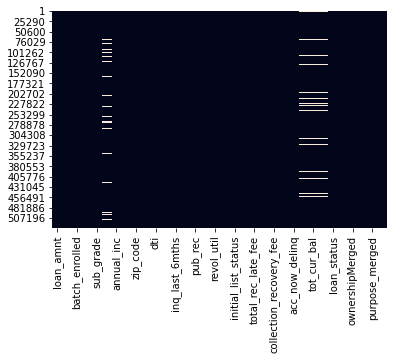

In [110]:
sn.heatmap(dfBank.isnull(), cbar=False)

In [111]:
#dfBank.drop(['mths_since_last_record', 'avg_delinq_score'], axis=1, inplace = True)

In [112]:
dfBank = dfBank.dropna()

<AxesSubplot:>

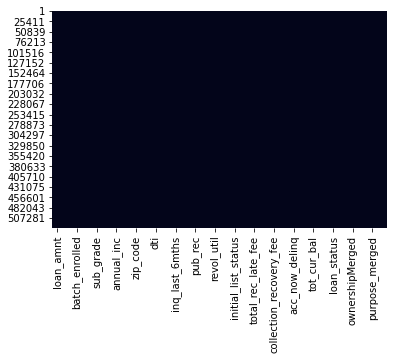

In [113]:
sn.heatmap(dfBank.isnull(), cbar=False)

In [114]:
dfBank.drop(['addr_state', 'zip_code'], axis=1, inplace = True) 

In [115]:
dfBank_TEST.drop(['addr_state', 'zip_code'], axis=1, inplace = True) 

In [116]:
print(dfBank_TEST.shape)

(354951, 31)


In [117]:
obj_dfBank.head()


,term,batch_enrolled,sub_grade,emp_length,verification_status,zip_code,addr_state,initial_list_status,last_week_pay,gradeMerged,ownershipMerged,pymnt_plan_merged,purpose_merged,application_type_merged
1,36 months,BAT1586599,B4,< 1 year,Source Verified,209xx,MD,w,9th week,B,MORTGAGE,n,home_improvement,INDIVIDUAL
2,36 months,BAT1586599,A4,2 years,Not Verified,447xx,OH,w,9th week,A,Other,n,debt_consolidation,INDIVIDUAL
3,36 months,BAT4808022,D5,10+ years,Not Verified,221xx,VA,f,135th week,D,RENT,n,debt_consolidation,INDIVIDUAL
4,36 months,BAT2833642,B2,10+ years,Verified,900xx,CA,w,96th week,B,RENT,n,credit_card,INDIVIDUAL
5,36 months,BAT2575549,A5,2 years,Not Verified,461xx,IN,f,113th week,A,MORTGAGE,n,debt_consolidation,INDIVIDUAL


In [118]:
dfBank.head()

,loan_amnt,term,batch_enrolled,int_rate,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,gradeMerged,ownershipMerged,pymnt_plan_merged,purpose_merged,application_type_merged
1,4800,36 months,BAT1586599,10.99,B4,< 1 year,65000.0,Source Verified,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,0.0,0.0,9974.0,32900.0,0,B,MORTGAGE,n,home_improvement,INDIVIDUAL
2,10000,36 months,BAT1586599,7.26,A4,2 years,45000.0,Not Verified,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,0.0,65.0,38295.0,34900.0,0,A,Other,n,debt_consolidation,INDIVIDUAL
3,15000,36 months,BAT4808022,19.72,D5,10+ years,105000.0,Not Verified,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,0.0,0.0,55564.0,24700.0,0,D,RENT,n,debt_consolidation,INDIVIDUAL
4,16000,36 months,BAT2833642,10.64,B2,10+ years,52000.0,Verified,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,0.0,0.0,47159.0,47033.0,0,B,RENT,n,credit_card,INDIVIDUAL
5,15000,36 months,BAT2575549,8.90,A5,2 years,120000.0,Not Verified,12.30,0.0,0.0,18.0,0.0,19040.0,64.5,30.0,f,1957.24,0.0,0.0,0.0,0.0,0.0,0.0,350619.0,29500.0,0,A,MORTGAGE,n,debt_consolidation,INDIVIDUAL


In [119]:
dfBank.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297678 entries, 1 to 532427
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   297678 non-null  int64  
 1   term                        297678 non-null  object 
 2   batch_enrolled              297678 non-null  object 
 3   int_rate                    297678 non-null  float64
 4   sub_grade                   297678 non-null  object 
 5   emp_length                  297678 non-null  object 
 6   annual_inc                  297678 non-null  float64
 7   verification_status         297678 non-null  object 
 8   dti                         297678 non-null  float64
 9   delinq_2yrs                 297678 non-null  float64
 10  inq_last_6mths              297678 non-null  float64
 11  open_acc                    297678 non-null  float64
 12  pub_rec                     297678 non-null  float64
 13  revol_bal     

In [120]:
obj_dfBank = dfBank.select_dtypes(include=['object']).copy()
obj_dfBank.head()

,term,batch_enrolled,sub_grade,emp_length,verification_status,initial_list_status,gradeMerged,ownershipMerged,pymnt_plan_merged,purpose_merged,application_type_merged
1,36 months,BAT1586599,B4,< 1 year,Source Verified,w,B,MORTGAGE,n,home_improvement,INDIVIDUAL
2,36 months,BAT1586599,A4,2 years,Not Verified,w,A,Other,n,debt_consolidation,INDIVIDUAL
3,36 months,BAT4808022,D5,10+ years,Not Verified,f,D,RENT,n,debt_consolidation,INDIVIDUAL
4,36 months,BAT2833642,B2,10+ years,Verified,w,B,RENT,n,credit_card,INDIVIDUAL
5,36 months,BAT2575549,A5,2 years,Not Verified,f,A,MORTGAGE,n,debt_consolidation,INDIVIDUAL


In [121]:
obj_dfBank_TEST = dfBank_TEST.select_dtypes(include=['object']).copy()

In [122]:
cat_term = pd.get_dummies(obj_dfBank.term)
cat_batch_enrolled = pd.get_dummies(obj_dfBank.batch_enrolled)
cat_sub_grade = pd.get_dummies(obj_dfBank.sub_grade)
cat_emp_length = pd.get_dummies(obj_dfBank.emp_length)
cat_verification_status = pd.get_dummies(obj_dfBank.verification_status)
cat_initial_list_status = pd.get_dummies(obj_dfBank.initial_list_status)
#cat_last_week_pay = pd.get_dummies(obj_dfBank.last_week_pay)




In [123]:
cat_term_TST = pd.get_dummies(obj_dfBank_TEST.term)
cat_batch_enrolled_TST = pd.get_dummies(obj_dfBank_TEST.batch_enrolled)
cat_sub_grade_TST = pd.get_dummies(obj_dfBank_TEST.sub_grade)
cat_emp_length_TST = pd.get_dummies(obj_dfBank_TEST.emp_length)
cat_verification_status_TST = pd.get_dummies(obj_dfBank_TEST.verification_status)
cat_initial_list_status_TST = pd.get_dummies(obj_dfBank_TEST.initial_list_status)

In [124]:
pd.set_option('display.max_columns', None)
print(cat_initial_list_status.columns.tolist())

['f', 'w']


In [125]:
print(cat_initial_list_status)

        f  w
1       0  1
2       0  1
3       1  0
4       0  1
5       1  0
...    .. ..
532420  1  0
532421  1  0
532424  0  1
532426  0  1
532427  1  0

[297678 rows x 2 columns]


In [126]:
cat_term = pd.get_dummies(obj_dfBank.term)
cat_gradeMerged = pd.get_dummies(obj_dfBank.gradeMerged)
cat_ownershipMerged = pd.get_dummies(obj_dfBank.ownershipMerged)
cat_pymnt_plan_merged = pd.get_dummies(obj_dfBank.pymnt_plan_merged)
cat_purpose_merged = pd.get_dummies(obj_dfBank.purpose_merged)
cat_application_type_merged = pd.get_dummies(obj_dfBank.application_type_merged)


In [127]:
cat_term_TST = pd.get_dummies(obj_dfBank_TEST.term)
cat_gradeMerged_TST = pd.get_dummies(obj_dfBank_TEST.gradeMerged)
cat_ownershipMerged_TST = pd.get_dummies(obj_dfBank_TEST.ownershipMerged)
cat_pymnt_plan_merged_TST = pd.get_dummies(obj_dfBank_TEST.pymnt_plan_merged)
cat_purpose_merged_TST = pd.get_dummies(obj_dfBank_TEST.purpose_merged)
cat_application_type_merged_TST = pd.get_dummies(obj_dfBank_TEST.application_type_merged)


In [128]:
cat_gradeMerged.rename(columns={'Other':'gradeMerged_other'},inplace=True)
cat_ownershipMerged.rename(columns={'Other':'ownershipMerged_other'},inplace=True)
cat_pymnt_plan_merged.rename(columns={'Other':'pymnt_plan_merged_other'},inplace=True)
cat_purpose_merged.rename(columns={'other':'purpose_merged_other_2'},inplace=True)
cat_purpose_merged.rename(columns={'Other':'purpose_merged_other_1'},inplace=True)
cat_application_type_merged.rename(columns={'Other':'application_type_merged_other'},inplace=True)

In [129]:
cat_gradeMerged_TST.rename(columns={'Other':'gradeMerged_other'},inplace=True)
cat_ownershipMerged_TST.rename(columns={'Other':'ownershipMerged_other'},inplace=True)
cat_pymnt_plan_merged_TST.rename(columns={'Other':'pymnt_plan_merged_other'},inplace=True)
cat_purpose_merged_TST.rename(columns={'other':'purpose_merged_other_2'},inplace=True)
cat_purpose_merged_TST.rename(columns={'Other':'purpose_merged_other_1'},inplace=True)
cat_application_type_merged_TST.rename(columns={'Other':'application_type_merged_other'},inplace=True)

In [130]:
pd.set_option('display.max_columns', None)
print(cat_application_type_merged.columns.tolist())

['INDIVIDUAL', 'application_type_merged_other']


In [131]:
dfBank = pd.concat([dfBank, cat_sub_grade, cat_emp_length, cat_verification_status, cat_initial_list_status], axis = 1)#cat_last_week_pay
#dfBank = pd.concat([dfBank, cat_sub_grade, cat_emp_length, cat_verification_status, cat_initial_list_status], axis = 1)
#cat_batch_enrolled,

In [132]:
dfBank = pd.concat([dfBank, cat_term, cat_gradeMerged, cat_ownershipMerged, cat_pymnt_plan_merged, cat_purpose_merged, cat_application_type_merged], axis = 1)

In [133]:
dfBank_TEST = pd.concat([dfBank_TEST, cat_sub_grade_TST, cat_emp_length_TST, cat_verification_status_TST, cat_initial_list_status_TST], axis = 1)#cat_last_week_pay
#cat_batch_enrolled_TST,


In [134]:
dfBank_TEST = pd.concat([dfBank_TEST, cat_term_TST, cat_gradeMerged_TST, cat_ownershipMerged_TST, cat_pymnt_plan_merged_TST, cat_purpose_merged_TST, cat_application_type_merged_TST], axis = 1)

In [135]:
print(cat_term_TST.shape)

(354951, 2)


In [136]:
print(dfBank_TEST.shape)

(354951, 100)


In [137]:
print(dfBank.columns.tolist())

['loan_amnt', 'term', 'batch_enrolled', 'int_rate', 'sub_grade', 'emp_length', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status', 'gradeMerged', 'ownershipMerged', 'pymnt_plan_merged', 'purpose_merged', 'application_type_merged', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', '1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year', 'Not Verified', 'Source Verified', 'Verified', 'f', 'w', '36 months', '60 months', 'A', 'B', 'C', 'D', 'gradeMerged_other', 'MORTGA

In [138]:
pd.set_option('display.max_columns', None)
print(dfBank_TEST.columns.tolist())

['loan_amnt', 'term', 'batch_enrolled', 'int_rate', 'sub_grade', 'emp_length', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'gradeMerged', 'ownershipMerged', 'pymnt_plan_merged', 'purpose_merged', 'application_type_merged', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', '1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year', 'Not Verified', 'Source Verified', 'Verified', 'f', 'w', '36 months', '60 months', 'A', 'B', 'C', 'D', 'gradeMerged_other', 'MORTGAGE', 'ownership

In [139]:
dfBank.drop(['batch_enrolled', 'sub_grade', 'emp_length', 'verification_status', 'initial_list_status'], axis = 1, inplace = True)
#dfBank.drop(['sub_grade', 'emp_length', 'verification_status', 'initial_list_status'], axis = 1, inplace = True)


In [140]:
dfBank_TEST.drop(['batch_enrolled', 'sub_grade', 'emp_length', 'verification_status', 'initial_list_status'], axis = 1, inplace = True)


In [141]:
dfBank.drop(['term', 'gradeMerged', 'ownershipMerged', 'pymnt_plan_merged', 'purpose_merged', 'application_type_merged'], axis = 1, inplace = True)

In [142]:
dfBank_TEST.drop(['term', 'gradeMerged', 'ownershipMerged', 'pymnt_plan_merged', 'purpose_merged', 'application_type_merged'], axis = 1, inplace = True)

In [143]:
#dfBank.drop(['cat_batch_enrolled'], axis = 1, inplace = True)
#dfBank_TEST.drop(['cat_batch_enrolled_TST'], axis = 1, inplace = True)

In [144]:
#dfBank_TEST.drop(['cat_batch_enrolled_TST'], axis = 1, inplace = True)

In [145]:
print(dfBank.columns)

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', '1 year', '10+ years', '2 years', '3 years', '4 years',
       '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year',
       'Not Verified', 'Source Verified', 'Verified', 'f', 'w', '36 months',
       '60 months', 'A', 'B', 'C', 'D', 'gradeMerged_other', 'MORTGAGE',
       'ownershipMerged_other', 'RENT', 'pymnt_plan_merged_other', 'n',
       'purpose_merged_other_1', 'credi

In [146]:
dfBank.shape

(297678, 90)

In [147]:
dfBank_TEST.shape

(354951, 89)

In [148]:
# Continuous Variables.

In [149]:
dfBank.describe().T #only display numeric cloumn also
#dfCity.describe(include='all').T #include non-numeric cloumn also

,count,mean,std,min,25%,50%,75%,max
loan_amnt,297678.0,15176.054075,8458.860377,1000.00,8800.00,14000.00,20000.00,35000.00
int_rate,297678.0,13.297731,4.410587,5.32,9.99,12.99,16.29,28.99
annual_inc,297678.0,76968.461622,66769.245141,5000.00,47840.00,65000.00,91400.00,8900060.00
dti,297678.0,18.391008,8.285887,0.00,12.16,17.89,24.27,83.40
delinq_2yrs,297678.0,0.331109,0.883059,0.00,0.00,0.00,0.00,30.00
...,...,...,...,...,...,...,...,...
credit_card,297678.0,0.238311,0.426051,0.00,0.00,0.00,0.00,1.00
debt_consolidation,297678.0,0.601879,0.489512,0.00,0.00,1.00,1.00,1.00
home_improvement,297678.0,0.056316,0.230531,0.00,0.00,0.00,0.00,1.00
INDIVIDUAL,297678.0,0.999375,0.024989,0.00,1.00,1.00,1.00,1.00


In [150]:
#we know Q3 AND Q1 AND IQR=Q3-Q1, any data point which is less than Q1-1.5IQR or Q3+1.5IQR are consider as outlier
# Analysis on Room_Bed feature
Q1=dfBank.loan_amnt.quantile(.25)
Q3=dfBank.loan_amnt.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",dfBank.loan_amnt.min())
print("Max Value ",dfBank.loan_amnt.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 1000
Max Value  35000
Q1  8800.0
Q3  20000.0
IQR  11200.0
lower_limit -8000.0
upper_limit 36800.0


In [151]:
## Analysis of continous variables
def removeoutliers(column):
    #y = df['rando']
    y = dfBank[column]
    removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
    y[removed_outliers].plot().get_figure()
    index_names = dfBank[~removed_outliers].index # INVERT removed_outliers!!
    dfBank.drop(index_names, inplace=True)

In [152]:
#removeoutliers(dfBank.loan_amnt)
print(dfBank.shape)


(297678, 90)


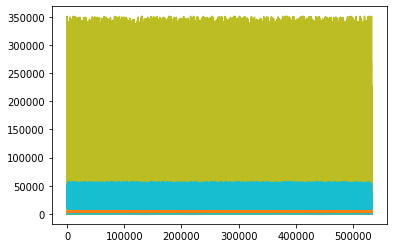

In [153]:
cnt_dfBank = dfBank.select_dtypes(exclude=['object']).copy()
for col in cnt_dfBank:
    removeoutliers(col)

In [154]:
print(dfBank.shape)

(56269, 90)


In [155]:
dfBank_major = dfBank[dfBank.loan_status == 0]
dfBank_minor = dfBank[dfBank.loan_status == 1]
print(dfBank_major.shape)
print(dfBank_minor.shape)
#dfBank_minor_upsampled = resample(dfBank_minor, replace = True, n_samples = 240737, random_state = 2000)
#dfBank_minor_upsampled = pd.concat([dfBank_minor_upsampled, dfBank_major])
#dfBank_minor_upsampled.loan_status.value_counts()
# resampling to overcome imbalanced sample set
# import library


(43223, 90)
(13046, 90)


In [156]:
X = dfBank.drop('loan_status',axis=1)
y = dfBank['loan_status']



# Class count
count_class_0, count_class_1 = dfBank['loan_status'].value_counts()

# Divide by class
dfBank_class_0 = dfBank[dfBank['loan_status'] == 0]
dfBank_class_1 = dfBank[dfBank['loan_status'] == 1]

dfBank_class_1_over = dfBank_class_1.sample(count_class_0, replace=True)
dfBank_test_over = pd.concat([dfBank_class_0, dfBank_class_1_over], axis=0)

dfBank_class_0_under = dfBank_class_0.sample(count_class_1)
dfBank_test_under = pd.concat([dfBank_class_0_under, dfBank_class_1], axis=0)

print('Random under-sampling:')
print(dfBank_test_under.loan_status.value_counts())

print('Random over-sampling:')
print(dfBank_test_over.loan_status.value_counts())


Random under-sampling:
0    13046
1    13046
Name: loan_status, dtype: int64
Random over-sampling:
0    43223
1    43223
Name: loan_status, dtype: int64


In [157]:
#X_train, X_test, y_train, y_test = train_test_split(dfBank.drop('loan_status',axis=1),dfBank['loan_status'], test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(dfBank.drop('loan_status',axis=1),dfBank['loan_status'], test_size=0.2)


In [158]:
print(dfBank.columns)

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', '1 year', '10+ years', '2 years', '3 years', '4 years',
       '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year',
       'Not Verified', 'Source Verified', 'Verified', 'f', 'w', '36 months',
       '60 months', 'A', 'B', 'C', 'D', 'gradeMerged_other', 'MORTGAGE',
       'ownershipMerged_other', 'RENT', 'pymnt_plan_merged_other', 'n',
       'purpose_merged_other_1', 'credi

In [159]:
print(dfBank_TEST.columns)

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2',
       'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4',
       'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       '1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', 'Not Verified',
       'Source Verified', 'Verified', 'f', 'w', '36 months', '60 months', 'A',
       'B', 'C', 'D', 'gradeMerged_other', 'MORTGAGE', 'ownershipMerged_other',
       'RENT', 'pymnt_plan_merged_other', 'n', 'purpose_merged_other_1',
       'credit_card', 'debt_

In [160]:
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import TomekLinks
#tl = TomekLinks()
#rus = RandomUnderSampler(random_state=42)
#X_rus, y_rus = rus.fit_resample(X_train, y_train)
#X_res, y_res = tl.fit_resample(X_train, y_train)
#dfBank.drop(['zip_code'], axis=1, inplace = True)
#from imblearn.over_sampling import SMOTE 
#sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(X_train, y_train)

#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=42)
#X_ros, y_ros = ros.fit_resample(X_train, y_train)

from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(dfBank.drop('loan_status', axis=1), dfBank['loan_status'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
#oversampled_train.columns = normalized_df.columns


In [161]:
X_train, X_test, y_train, y_test = train_test_split(oversampled_train.drop('loan_status',axis=1),oversampled_train['loan_status'], test_size=0.2)


In [162]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [163]:
predictions = model.predict(X_test)


No handles with labels found to put in legend.


Logistic: f1=0.634 auc=0.581


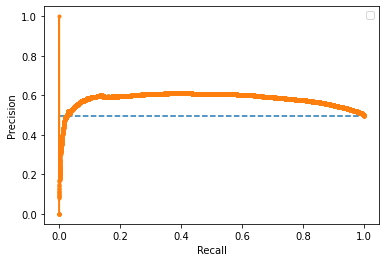

In [164]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# predict probabilities
lr_probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--')
pyplot.plot(lr_recall, lr_precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [165]:
#classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58      8692
           1       0.59      0.68      0.63      8598

    accuracy                           0.61     17290
   macro avg       0.61      0.61      0.61     17290
weighted avg       0.61      0.61      0.61     17290



In [166]:
from sklearn.metrics import confusion_matrix



print(confusion_matrix(y_test, predictions))

[[4654 4038]
 [2732 5866]]


In [167]:
print(predictions)

[0 1 1 ... 1 1 0]


[[4654 4038]
 [2732 5866]]


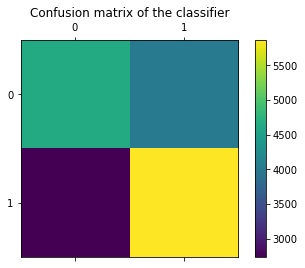

In [168]:
cm = confusion_matrix(y_test, predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

plt.show()

In [169]:
dfBank_TEST.fillna(0)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,Not Verified,Source Verified,Verified,f,w,36 months,60 months,A,B,C,D,gradeMerged_other,MORTGAGE,ownershipMerged_other,RENT,pymnt_plan_merged_other,n,purpose_merged_other_1,credit_card,debt_consolidation,home_improvement,INDIVIDUAL,application_type_merged_other
0,14000,16.24,73500.0,28.65,1.0,1.0,16.0,0.0,29828,65.3,53.0,3915.61,0.0,0.0,0.0,0.0,0.0,0.0,85230.0,45700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0
1,16000,9.49,105000.0,31.19,0.0,0.0,8.0,0.0,4161,19.4,63.0,1495.06,0.0,0.0,0.0,0.0,0.0,0.0,444991.0,21400.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
2,11050,15.61,62300.0,21.73,1.0,0.0,11.0,1.0,12064,74.0,20.0,2096.21,0.0,0.0,0.0,0.0,0.0,0.0,105737.0,16300.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
3,35000,12.69,150000.0,17.27,0.0,0.0,21.0,0.0,32549,45.0,26.0,1756.31,0.0,0.0,0.0,0.0,0.0,0.0,287022.0,72400.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,6500,6.89,52000.0,20.19,0.0,0.0,16.0,0.0,5133,19.2,36.0,172.21,0.0,0.0,0.0,0.0,0.0,0.0,234278.0,26700.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,15000,6.49,97250.0,12.46,0.0,0.0,12.0,0.0,12201,27.7,24.0,1180.32,0.0,0.0,0.0,0.0,0.0,0.0,143920.0,44000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
354947,35000,25.89,180000.0,11.78,2.0,2.0,21.0,0.0,52584,61.4,33.0,6508.41,0.0,0.0,0.0,0.0,0.0,0.0,772713.0,85700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
354948,14000,17.51,56000.0,16.44,0.0,3.0,11.0,1.0,10948,66.1,25.0,3456.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0
354949,20000,7.26,100000.0,15.00,0.0,0.0,7.0,0.0,33599,61.5,11.0,766.84,0.0,0.0,0.0,0.0,0.0,0.0,291998.0,54600.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0


In [170]:
#dfBank_TEST = dfBank_TEST.reset_index()
#np.any(np.isnan(dfBank_TEST))
#np.all(np.isfinite(dfBank_TEST))
#dfBank_TEST = np.nan_to_num(dfBank_TEST)
#np.all(np.isfinite(dfBank_TEST))
#predictions = model.predict(dfBank_TEST)
dfBank_TEST_1 = dfBank_TEST.copy()
#dfBank_TEST_1 = dfBank_TEST_1.reset_index()




In [171]:
np.all(np.isfinite(dfBank_TEST))
from sklearn.impute import SimpleImputer

In [172]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf, "", " "]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [173]:
print(dfBank_TEST.shape)
#dfBank_TEST_1 = clean_dataset(dfBank_TEST_1)
dfBank_TEST_1.replace([np.nan, np.inf, -np.inf, "", " "], 0, inplace=True)
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(dfBank_TEST_1.shape)

(354951, 89)
(354951, 89)


In [174]:
print(dfBank_TEST_1.columns.tolist())

['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', '1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year', 'Not Verified', 'Source Verified', 'Verified', 'f', 'w', '36 months', '60 months', 'A', 'B', 'C', 'D', 'gradeMerged_other', 'MORTGAGE', 'ownershipMerged_other', 'RENT', 'pymnt_plan_merged_other', 'n', 'purpose_merged_other_1', 'credit_card', 'debt_consolidation', 'home_improvement', 'INDIVIDUAL', 'application_type_merged_other']


In [175]:
print(X_train.columns.tolist())

['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', '1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year', 'Not Verified', 'Source Verified', 'Verified', 'f', 'w', '36 months', '60 months', 'A', 'B', 'C', 'D', 'gradeMerged_other', 'MORTGAGE', 'ownershipMerged_other', 'RENT', 'pymnt_plan_merged_other', 'n', 'purpose_merged_other_1', 'credit_card', 'debt_consolidation', 'home_improvement', 'INDIVIDUAL', 'application_type_merged_other']


In [176]:
#dfBank_TEST_1 = dfBank_TEST_1.reset_index()

In [177]:
predictions = model.predict(dfBank_TEST_1)

In [183]:
print(predictions)
print(dfBank_TEST_1.shape)

[1 1 1 ... 1 0 0]
(354951, 89)


In [179]:
res = pd.DataFrame(predictions)
res["member_id"]= test_csv['member_id'] # its important for comparison
res.columns = ["member_id", "prediction"]
res.to_csv("prediction_results.csv")

In [226]:
#prediction = pd.DataFrame([(test_csv['member_id'],predictions)], columns=['member_id', 'predictions']).to_csv('prediction.csv')
#print(predictions)
member_id=np.array(test_csv['member_id'])
label=np.array(predictions)
dataset=pd.DataFrame(list(zip(member_id, label)), columns=['member_id', 'predictions']).to_csv('prediction_results.csv', index=False)


[1 1 1 ... 1 0 0]


In [195]:
print(member_id.shape)

(354951,)


In [182]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    354951 non-null  int64  
 1   loan_amnt                    354951 non-null  int64  
 2   funded_amnt                  354951 non-null  int64  
 3   funded_amnt_inv              354951 non-null  float64
 4   term                         354951 non-null  object 
 5   batch_enrolled               309352 non-null  object 
 6   int_rate                     354951 non-null  float64
 7   grade                        354951 non-null  object 
 8   sub_grade                    354951 non-null  object 
 9   emp_title                    334322 non-null  object 
 10  emp_length                   337017 non-null  object 
 11  home_ownership               354951 non-null  object 
 12  annual_inc                   354950 non-null  float64
 13 